C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Absolute Error: 0.23816666666666694
Mean Squared Error: 0.06991091666666681
Root Mean Squared Error: 0.26440672583477676
R-squared: -3.494273214285724


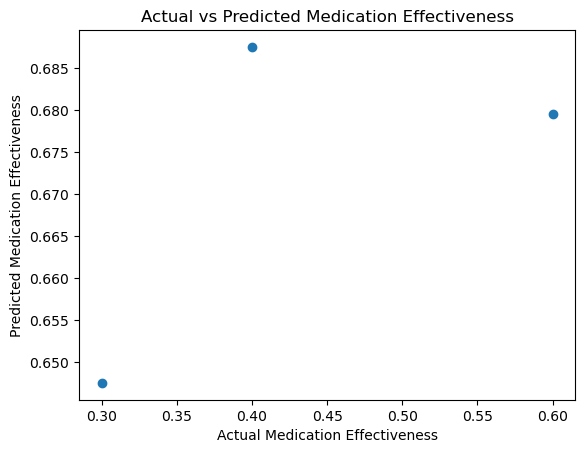

Predicted medication effectiveness for new patient: 0.7690000000000006


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset from CSV file
df = pd.read_csv('medication_effectiveness.csv')

# Features and target
X = df.drop('medication_effectiveness', axis=1)  # Features (input variables)
y = df['medication_effectiveness']  # Target (effectiveness score)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model (Random Forest Regressor for continuous target variable)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Medication Effectiveness')
plt.ylabel('Predicted Medication Effectiveness')
plt.title('Actual vs Predicted Medication Effectiveness')
plt.show()

# Sample prediction (e.g., for a new patient)
new_patient_data = pd.DataFrame({
    'age': [60],
    'sex': [0],  # female
    'dosage': [150],
    'treatment_duration': [30],
    'comorbidities': [2],
    'side_effects': [1]
})

predicted_effectiveness = model.predict(new_patient_data)
print(f'Predicted medication effectiveness for new patient: {predicted_effectiveness[0]}')